C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [22:09:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


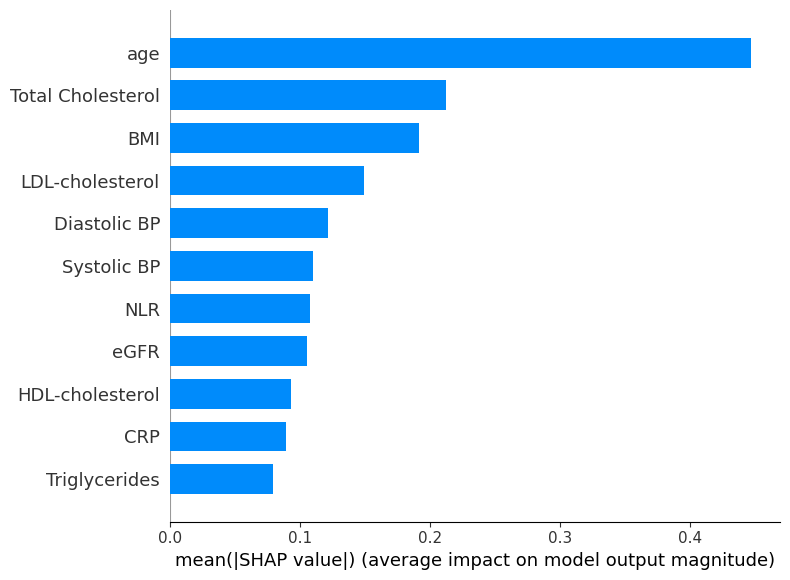

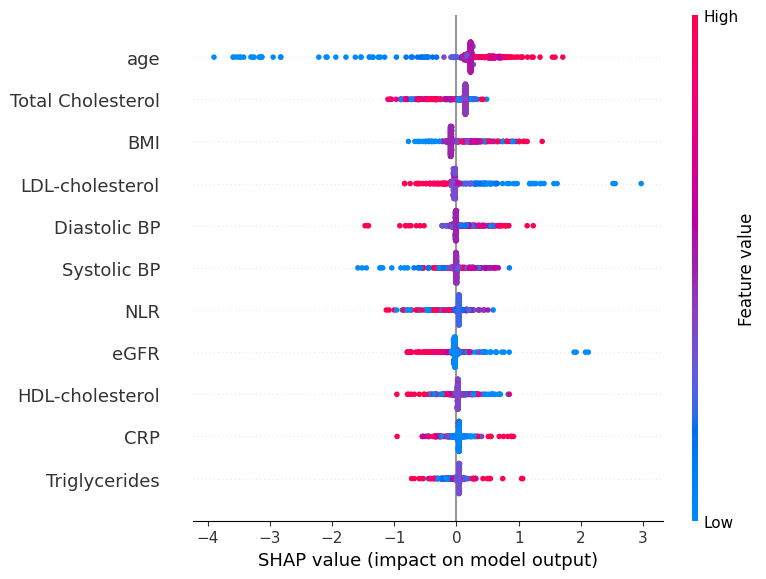

In [5]:
# 1. 필요한 라이브러리 불러오기
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. 사용자 정의 변수명 매핑 (원래 변수명 → 출력 변수명)
column_name_mapping = {
    "Age": "Age",
    "TC": "Total Cholesterol",
    "BMI": "BMI",
    "LDL": "LDL-cholesterol",
    "DBP": "Diastolic BP",
    "SBP": "Systolic BP",
    "NLR": "NLR",  # 약어 유지
    "eGFR": "eGFR",
    "HDL": "HDL-cholesterol",
    "CRP": "CRP",
    "TG": "Triglycerides"
}

# 3. 데이터 불러오기 및 전처리
df = pd.read_excel("CACS_model_ready_imputed.xlsx")
df["CACS_binary"] = (df["CACS"] >= 100).astype(int)

# 4. 변수명 변경 및 X, y 분리
X = df.drop(columns=["CACS", "CACS_binary"]).rename(columns=column_name_mapping)
y = df["CACS_binary"]

# 5. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. XGBoost 모델 학습
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# 7. SHAP 분석
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 8. SHAP summary plot 출력
shap.summary_plot(shap_values, X_test, plot_type="bar")   # 바 차트
shap.summary_plot(shap_values, X_test)                    # beeswarm 플롯

